In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
# Load the dataset
data = pd.read_csv('weatherAUS.csv')

In [4]:
# Drop rows with missing values in the target column ('RainTomorrow')
data = data.dropna(subset=['RainTomorrow'])

In [5]:
# Select relevant features
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
            'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
            'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [6]:
# Handle missing values in numerical columns by filling with mean values
data[features] = data[features].fillna(data[features].mean())

In [7]:
# Encode categorical variable 'RainToday'
le = LabelEncoder()
data['RainToday'] = le.fit_transform(data['RainToday'])

In [8]:
# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

In [9]:
# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [10]:
# Determine the optimal number of clusters using silhouette score
max_clusters = 10
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [11]:
optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 because range started from 2

In [12]:
# Perform K-Means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

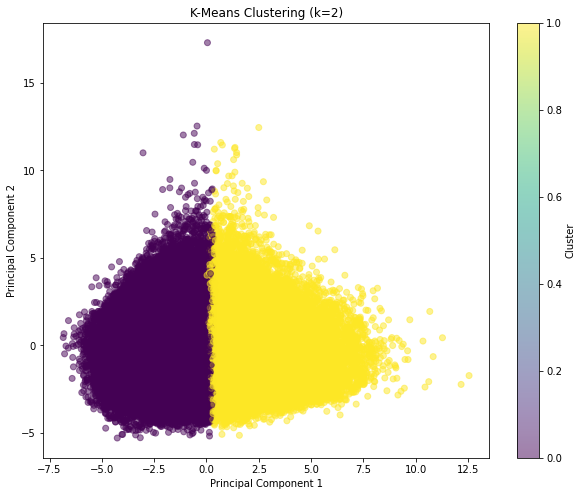

In [13]:
# Visualize clusters using PCA components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [15]:
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=features)
print("\nCluster Centers (Original Feature Space):")
print(cluster_centers_df)


Cluster Centers (Original Feature Space):
     MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0   8.634574  18.375905  2.916539     4.277369  6.765519      37.524885   
1  16.545676  29.180433  1.654610     6.933365  8.679543      43.002805   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0     12.716586     17.032705    77.293795    58.948728  1020.060384   
1     15.579606     20.607288    58.472857    42.319181  1014.700026   

   Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  
0  1017.976121  4.937338  4.972779  12.759636  17.122286  
1  1011.922411  3.823340  3.926796  22.176520  27.289952  


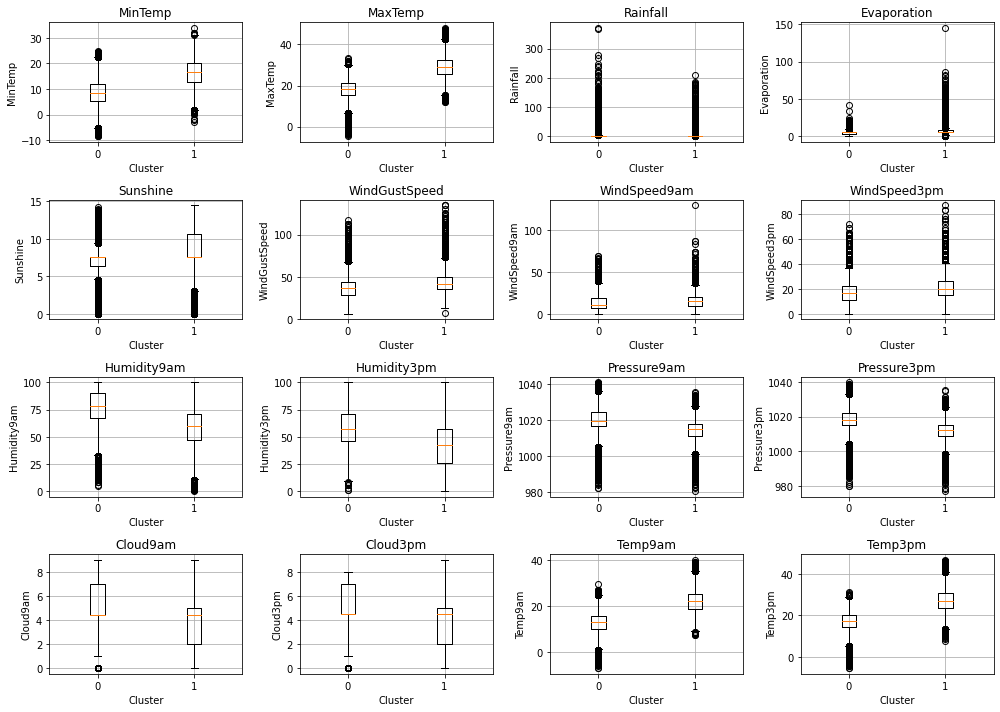

In [16]:
# Cluster Distribution of Features (Box Plots)
data_clustered = data.copy()
data_clustered['Cluster'] = cluster_labels  # Add cluster labels to the original dataframe

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    plt.title(feature)
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.boxplot([data_clustered[data_clustered['Cluster'] == c][feature] for c in range(optimal_k)], labels=range(optimal_k))
plt.tight_layout()
plt.show()


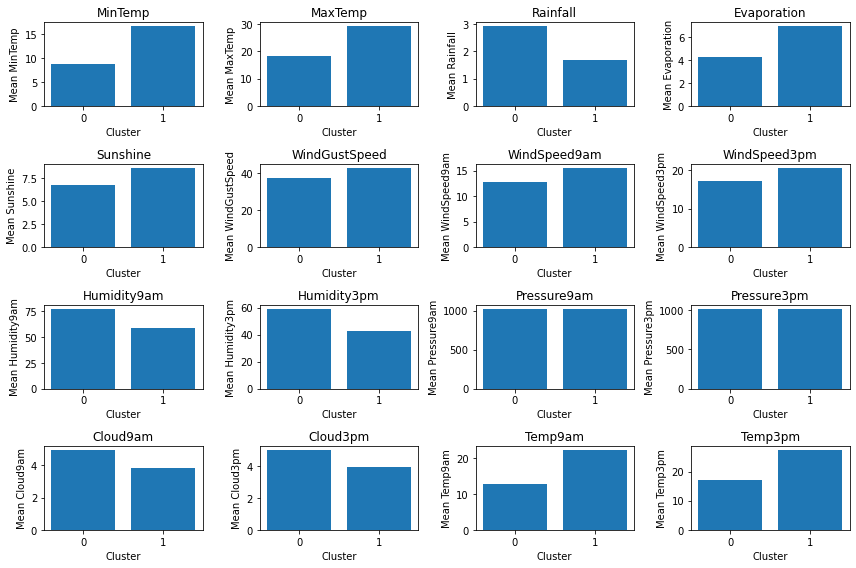

In [17]:
# Cluster Profiles (Average Feature Values)
cluster_means = data_clustered.groupby('Cluster')[features].mean()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    plt.bar(range(optimal_k), cluster_means[feature])
    plt.title(feature)
    plt.xlabel('Cluster')
    plt.ylabel('Mean ' + feature)
    plt.xticks(range(optimal_k))
plt.tight_layout()
plt.show()

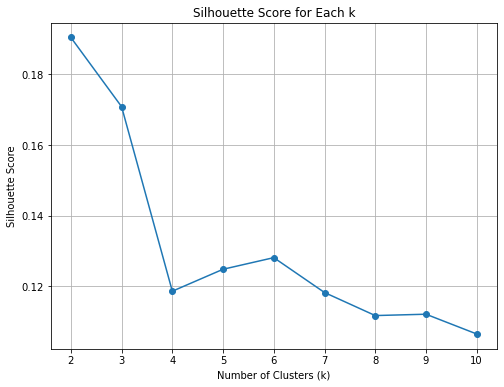

In [18]:
# Silhouette Analysis
plt.figure(figsize=(8, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Each k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, max_clusters + 1))
plt.grid(True)
plt.show()

## Exporting the model

In [20]:
import pickle

In [21]:
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [22]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)